# Clustering countries by Socio-economic factors

In this project, countries will be **clustered** on the basis of **socio-economic and health** factors. **Aim** of this project is to find actionable clusters by factors mentioned to assist in identification of countries requiring the most help and aid. **Principal Component Analysis** is used in this project to reduce amount of correlated variables, and **k-means and hierarchical** clustering methods are used to form the clusters.

Libraries used in this project: **Numpy, Pandas, Matplotlib, Seaborn, Scikit-learn, Scipy**

## Content

**1. Introduction** <br>
1.1 - Understanding the Business Problem <br>
1.2 - Data <br>
1.3 - Importing Modules and Pulling Data <br>
**2. Data Preparation** <br>
2.1 - Data Cleaning <br>
2.2 - Exploratory Data Analysis <br>
2.3 - Scaling and Standardization <br>
**3. Principal Component Analysis** <br>
**4. Clustering** <br>
4.1 - K-means Clustering <br>
4.2 - Hierarchical Clustering

## 1. Introduction

### 1.1 - Understanding the Business Problem

**HELP International** is an international humanitarian NGO which is committed to eradicating poverty and providing people from backward countries with basic amenities and relief during time of disasters and natural calamities. It runs a lot of projects and advocacy drives to raise awareness and funds.

After the recent funding events, they have raised a total of $10 million. They want to decide the best way to utilize this money effectively. The most significant issue is choosing the countries that are in most need of aid.

### 1.2 - Data

Data for this project contains 1 source of data and an associated data dictionary.

The dataset *('Country-data.csv')* contains socio-economic information about all countries. It contains important metrics such as **child mortality, gdp per capita, income, % of gdp spent on health** among others. 

### 1.3 - Importing Modules and Pulling Data

In [131]:
# importing the basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [228]:
# importing the required modules for clustering and PCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [183]:
# importing the required modules for hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [133]:
# pulling data

countries_data = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 3 - Machine Learning - 1\Module 6 - PCA & Clustering Assignment\Country-data.csv')

In [134]:
countries_data.shape

(167, 10)

In [135]:
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 2. Data Preparation

Contains of the following parts: <br>
2.1 - Data Cleaning <br>
2.2 - Exploratory Data Analysis <br>
2.3 - Scaling and Standardization

### **2.1 - Data Cleaning**

In this section, null values are dealt with, datatypes are checked, and outliers analyzed.

In [136]:
# number of null values

countries_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values. This is a clean dataset.

In [137]:
# checking the datatypes
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


The datatypes for the columns are correct.

In [138]:
# converting % columns to appropiate format

countries_data['exports'] = (countries_data['exports']*countries_data['gdpp'])/100
countries_data['imports'] = (countries_data['imports']*countries_data['gdpp'])/100
countries_data['health'] = (countries_data['health']*countries_data['gdpp'])/100

In [139]:
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


We have converted the values in the exports, health, imports and inflation columns with the gdpp to accurately portray the current spending per capita rather than spending as a % of gdp.

In [140]:
# describing the data
countries_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Since the dataset has very few rows (only 167), we have to be very careful on treating outliers. Also, the business use case here is to identify countries that require the most assistance, treating outliers can be problematic.

### **2.2 - Exploratory Data Analysis**

We will do a univariate analysis on these columns: **'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'**.

In [141]:
# function to plot graphs for univariate analysis for continuous variable
def univariate(df,col1,col2,col3):
    '''
    Univariate function will plot a scatter plot based on the parameters.
    df      : dataframe name
    col1    : Column name
    col2    : Column name
    col3    : Column name
    '''
    sns.set(style="darkgrid")
    plt.figure(figsize=(20,8))
    
    plt.subplot(131)
    sns.boxplot(data=df, y=col1)
    
    plt.subplot(132)
    sns.boxplot(data=df, y=col2)
    
    plt.subplot(133)
    sns.boxplot(data=df, y=col3)
    plt.show()

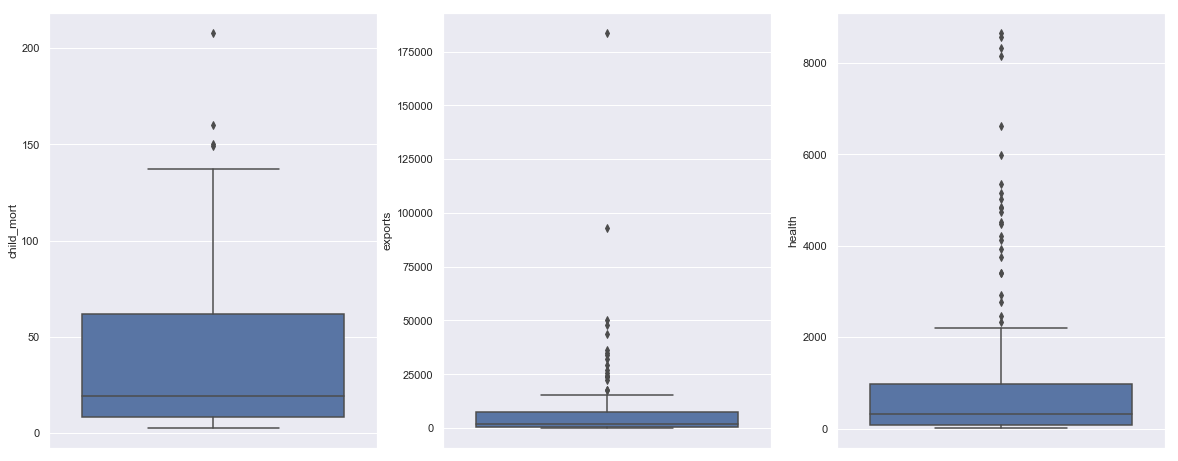

In [142]:
univariate(countries_data,'child_mort', 'exports', 'health')

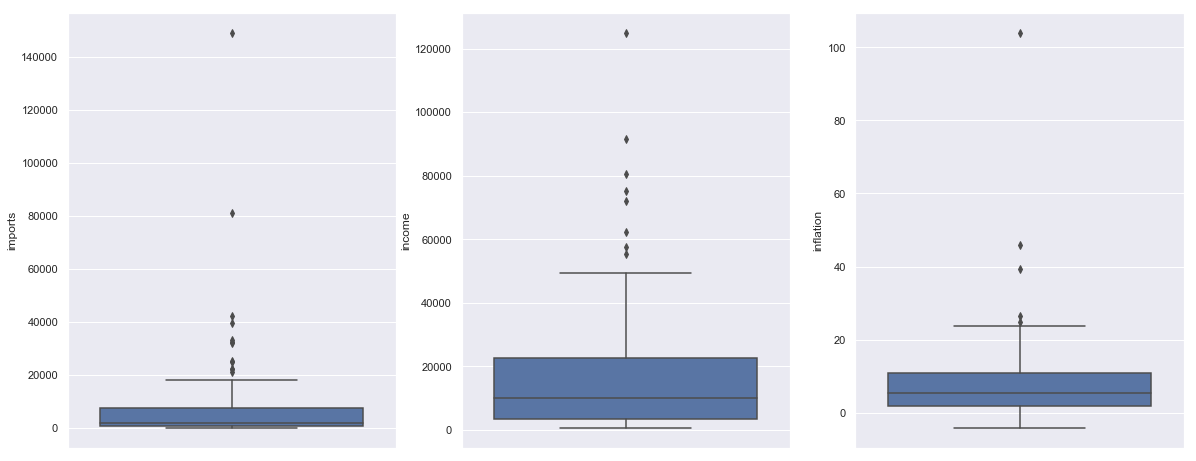

In [143]:
univariate(countries_data,'imports', 'income', 'inflation')

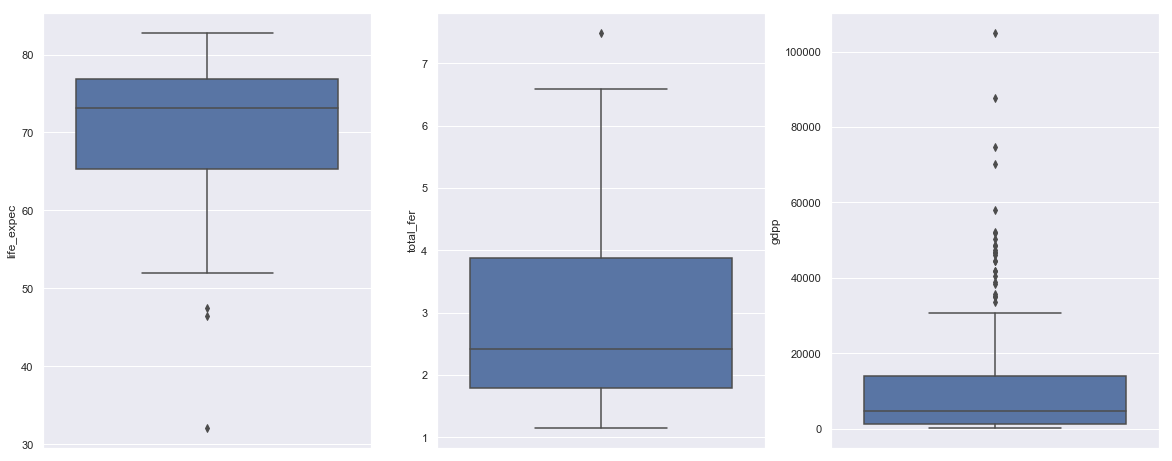

In [144]:
univariate(countries_data,'life_expec', 'total_fer', 'gdpp')

From the above, we can see that:
**Child mortality** is generally low apart from the countries that do poorly. The range of values from 25th to 50th percentile is far less than 50th to 75th percentile.
**exports** for countries has 2 clear outliers. These would be the most richest countries.
**health** spending per capita has a couple of high reaching outliers.
**imports** per capita also has some outliers similar to that of exports confirming the presence of highly dynamic and rich nations.
**inflation** for the most part is low but has some clear outliers. This does suggest the presence of countries going through a very tough time.
**income** is well balanced but has a few outliers for the countries where the average person is very rich. This possibly could be rich smaller nations.
**life_expectancy** is high for the most part but has some very low outliers which we are trying to group into the same cluster.
**total_fertility** averages around 2.5 but has some outliers which indicate poverty and lack of family planning in poorer countries.
**gdpp** as expected has outliers for the rich countries present in this data.

From the above, we found some really good insights which we can confirm later with. If needed be, we could potentially drop some positive outliers but we won't as data loss will be very high. We will lose a lot of variance which can really affect the clusters formed.

### **2.3 - Scaling and Standardization**

Dataset will be scaled and standardized before running Principal Components Analysis as it requires every variable to be in the same scale to prevent variable bias.

In [145]:
# dropping the categorical column
data = countries_data.drop('country', axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [146]:
# initializing the standard scaler and fitting and transforming our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [147]:
# displaying the scaled dataset
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = data.columns
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


The above dataset is scaled and ready for Principal Component Analyis (PCA) to even further reduce the amount of variables.

## 3. Principal Component Analysis (PCA)

Principal Component Analysis is used here to convert the correlated variables in the dataset into linearly uncorrelated variables known as principal components. 

In [148]:
# initializing pca object and applying on our dataset
pca_obj = PCA(svd_solver='randomized')
pca_obj.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [149]:
# list of the pca components
pca_obj.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [150]:
# getting the variance ratios
pca_obj.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

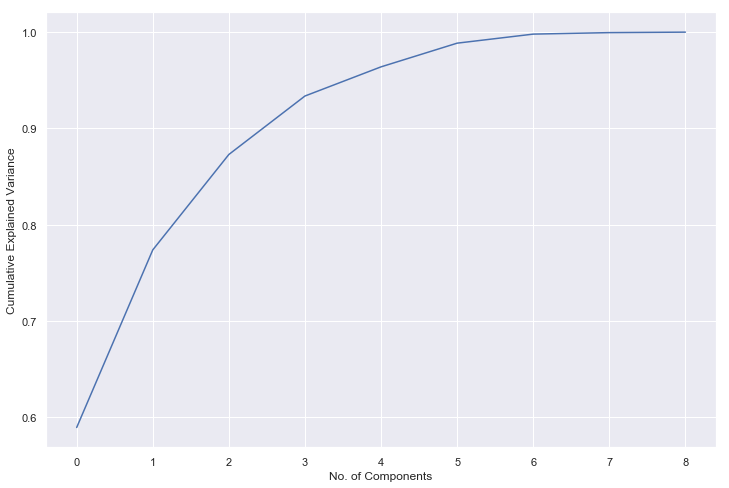

In [151]:
# plotting the scree plot to better visualize the variance of the principal components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

From the above scree plot, we can see that 2 principal components explains 89% of the data. So we will choose these 2 components.

In [152]:
#understanding how the original variables are located on the principal components.
colnames = list(data_scaled.columns)
data_pca = pd.DataFrame({'Feature':colnames, 'PC1':pca_obj.components_[0],'PC2':pca_obj.components_[1]})
data_pca

,Feature,PC1,PC2
0,child_mort,-0.316392,0.476267
1,exports,0.342887,0.397311
2,health,0.358535,0.155053
3,imports,0.344865,0.370781
4,income,0.380041,0.128384
5,inflation,-0.143085,0.221261
6,life_expec,0.343857,-0.369820
7,total_fer,-0.302842,0.459715
8,gdpp,0.399988,0.200624


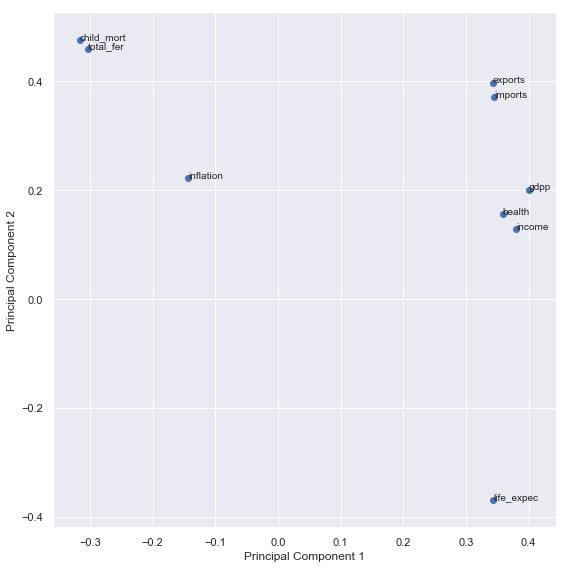

In [153]:
# plotting the features to see how the features are loaded in the principal components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(data_pca.PC1, data_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(data_pca.Feature):
    plt.annotate(txt, (data_pca.PC1[i],data_pca.PC2[i]))
plt.tight_layout()
plt.show()

In [154]:
# dimensionality reduction using 2 principal components
data_pca2 = IncrementalPCA(n_components=2)

In [155]:
# applying to our dataset
data_pca3 = data_pca2.fit_transform(data_scaled)
data_pca3.shape

(167, 2)

In [156]:
data_pca3

array([[-2.63781321e+00,  1.48536461e+00],
       [-2.28210939e-02, -1.42971156e+00],
       [-4.56234772e-01, -7.07360261e-01],
       [-2.72276377e+00,  2.15229306e+00],
       [ 6.49117451e-01, -1.01774207e+00],
       [ 3.94157308e-02, -7.30261748e-01],
       [-3.32874986e-01, -1.27774541e+00],
       [ 3.18004346e+00, -2.42945480e-01],
       [ 3.81521984e+00,  2.70503210e-01],
       [-4.66682132e-01, -5.12070612e-01],
       [ 1.49764135e+00, -4.07261928e-01],
       [ 1.47173856e+00, -3.48835344e-01],
       [-1.01470326e+00, -7.04204726e-01],
       [ 8.44156324e-01, -9.92326449e-01],
       [-1.23125395e-02, -1.01063660e+00],
       [ 3.96056409e+00,  8.51654535e-01],
       [-4.03848235e-01, -9.05487852e-01],
       [-2.36763892e+00,  1.20900783e+00],
       [-7.15518871e-01, -7.61656090e-01],
       [-1.01785700e+00, -4.27509939e-01],
       [ 2.51782613e-01, -1.68612275e+00],
       [-1.13121768e+00,  4.07034302e-01],
       [ 1.66361284e-01, -1.02506573e+00],
       [ 2.

In [169]:
# converting to dataframe 
data_pca4 = pd.DataFrame(data_pca3)
data_pca4.columns = ['PC1','PC2']

In [171]:
data_pca4.head()

,PC1,PC2
0,-2.637813,1.485365
1,-0.022821,-1.429712
2,-0.456235,-0.707360
3,-2.722764,2.152293
4,0.649117,-1.017742


In [172]:
data_pca4.shape

(167, 2)

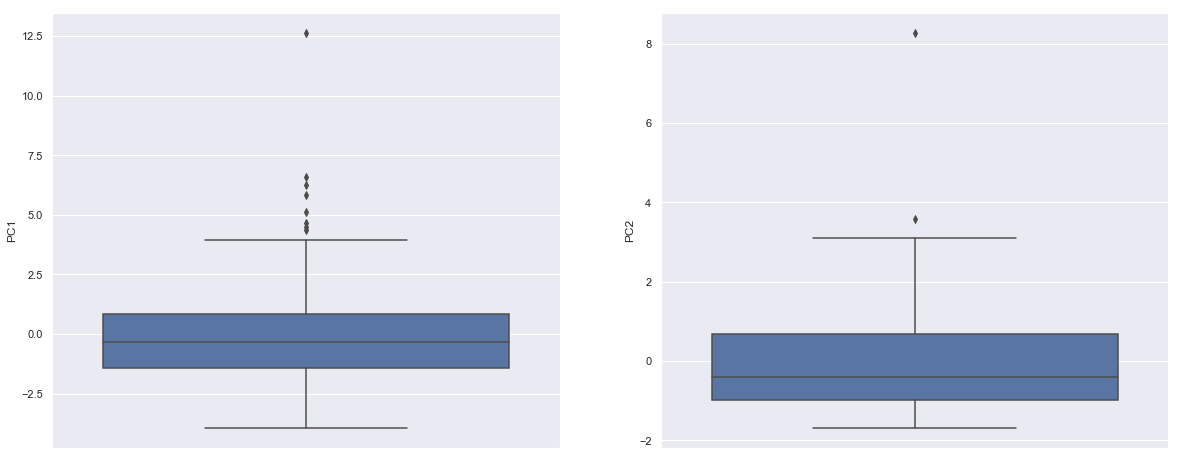

In [175]:
# Let's analyze the 2 columns of the data after pca
sns.set(style="darkgrid")
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.boxplot(data=data_pca4, y='PC1')

plt.subplot(122)
sns.boxplot(data=data_pca4, y='PC2')
plt.show()

There are a few outliers in both these columns. As to prevent data loss due to less data and the need to spot poorly performing countries, let's not remove any outliers yet.

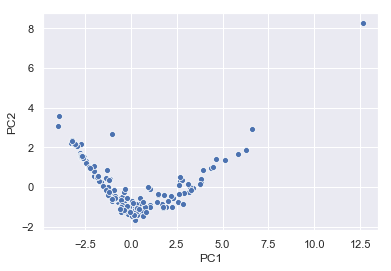

In [176]:
# visualizing points on the PCs Visualising the points on the PCs.
sns.scatterplot(x='PC1',y='PC2',data=data_pca4)

From the above, we spot one very clear outlier for both PC1 and PC2. Since it looks like it can skew the rest the data, let us remove this one outlier.

In [181]:
data_pca4 = data_pca4[~(data_pca4.PC1 > 12.5)]

In [182]:
data_pca4.shape

(166, 2)

## 4. Clustering

Before any clustering methods can be run, dataset is checked to see how suitable it is for clustering. 

Contains of the following sections: <br>
4.1 - K-means Clustering <br>
4.2 - Hierarchical Clustering 

In [184]:
# function for hopkins statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [185]:
# checking the hopkins score to see if our dataset is suitable for clustering
hopkins(data_pca4)

0.8916002412360248

As the score is 0.89 which is more than 0.5, our data is very suitable to form meaningful clusters.

In [186]:
data_cluster1 = data_pca4

### 4.1 - K-means Clustering

K-means algorithm is used to build clusters with similar datapoints. Before running the algorithm, optimal number of clusters has to be decided.

In [190]:
# calculating the silhouette score to check optimal values for k
cluster_count = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in cluster_count:
    kmeans = KMeans(n_clusters=num_clusters).fit(data_cluster1) # intialising kmeans
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_cluster1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5327763271886311
For n_clusters=3, the silhouette score is 0.5668762735271232
For n_clusters=4, the silhouette score is 0.5595485065808936
For n_clusters=5, the silhouette score is 0.5019942470875981
For n_clusters=6, the silhouette score is 0.4717826743643499
For n_clusters=7, the silhouette score is 0.47241924955723663
For n_clusters=8, the silhouette score is 0.4414549857863987


From the above, 3 or 4 clusters seem to yield the best silhoutte score. Let's also check the optimal number of k using elbow curve method.

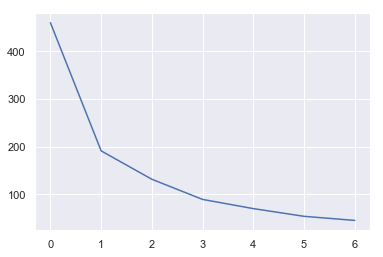

In [194]:
# elbow-curve method
ssd = []
cluster_count = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in cluster_count:
    kmeans = KMeans(n_clusters=num_clusters).fit(data_cluster1)
    ssd.append(kmeans.inertia_)
plt.plot(ssd) # plotting the SSDs for each n_clusters

From the above, the x-axis count is actually 2 more than what's given as our number of clusters starts from 2 and ends at 8. The most distinct bend is at n = 3 (x axis at 1 in the plot). Hence, we will model with **3 clusters**.

In [195]:
# model with k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_cluster1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [196]:
# dataframe with PCs and associated clusterID
data_cluster1.index = pd.RangeIndex(len(data_cluster1.index))
data_cluster2 = pd.concat([data_cluster1, pd.Series(kmeans.labels_)], axis=1)
data_cluster2.columns = ['PC1', 'PC2','ClusterID']
data_cluster2.head()

,PC1,PC2,ClusterID
0,-2.637813,1.485365,1
1,-0.022821,-1.429712,0
2,-0.456235,-0.707360,0
3,-2.722764,2.152293,1
4,0.649117,-1.017742,0


In [200]:
# checking number of count in cluster
data_cluster2.ClusterID.value_counts()

0    88
1    48
2    30
Name: ClusterID, dtype: int64

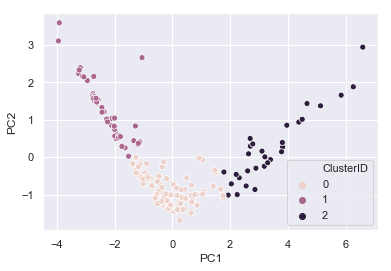

In [201]:
# plotting the clusters
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_cluster2)

In [202]:
# merging with the original dataset
countries_data2=pd.merge(countries_data,data_cluster2, left_index=True,right_index=True)
countries_data2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637813,1.485365,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022821,-1.429712,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.456235,-0.707360,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722764,2.152293,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649117,-1.017742,0


In [208]:
# let's analyze the child_mort, income, and gdpp columns based on the clusters.
grouped = countries_data2.groupby('ClusterID')

In [209]:
grouped[['child_mort','income','gdpp']].mean()

,child_mort,income,gdpp
ClusterID,,,
0,26.940909,15923.954545,10939.431818
1,68.937500,8944.270833,4955.937500
2,20.940000,34308.333333,32099.966667


In [211]:
# function to plot graphs for univariate analysis for continuous variable
def univariate_cluster(df,col1,col2,col3):
    '''
    Univariate function will plot a scatter plot based on the parameters.
    df      : dataframe name
    col1    : Column name
    col2    : Column name
    col3    : Column name
    '''
    sns.set(style="darkgrid")
    plt.figure(figsize=(20,8))
    
    plt.subplot(131)
    sns.boxplot(data=df, x='ClusterID', y=col1)
    
    plt.subplot(132)
    sns.boxplot(data=df, x='ClusterID', y=col2)
    
    plt.subplot(133)
    sns.boxplot(data=df, x='ClusterID', y=col3)
    plt.show()

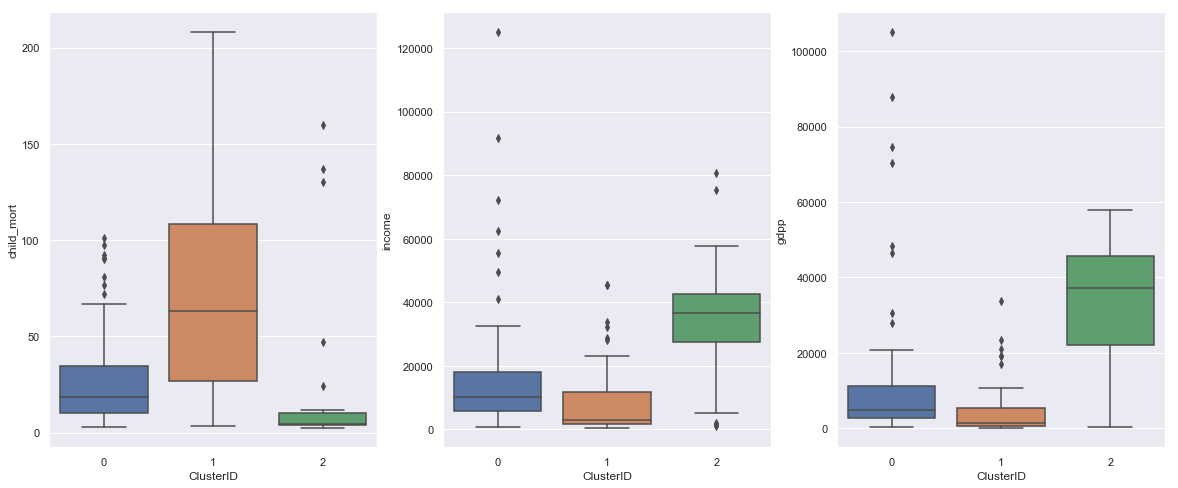

In [212]:
univariate_cluster(countries_data2,'child_mort','income','gdpp')

From the above, we can see that the cluster that is of our interest is the 2nd cluster (ClusterID = 1). This is because the 2nd cluster has highest child mortality, lowest income, and lowest gdp per capita.

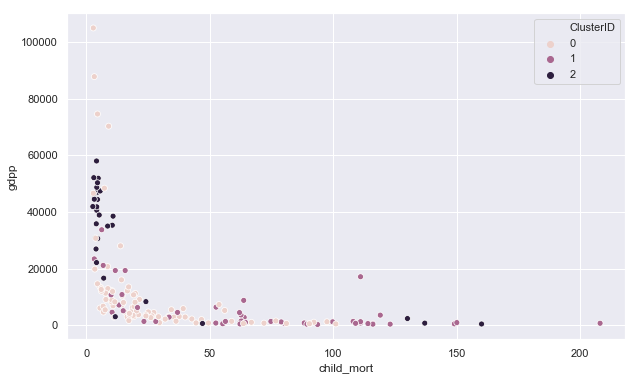

In [216]:
# plotting scatter plot child_mort vs gdpp
plt.figure(figsize=(10,6))
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=countries_data2)

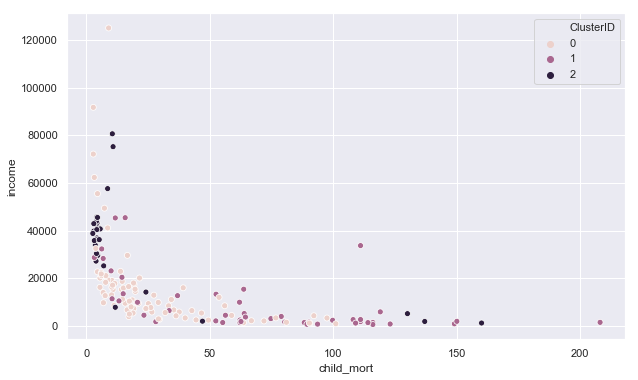

In [217]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',legend='full',data=countries_data2)

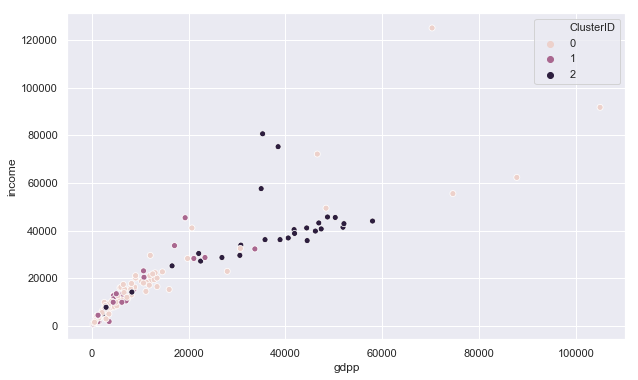

In [218]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=countries_data2)

From the above, it is very clear that the 2nd cluster (clusterID = 1) is severely underperforming on child mortality, income and gdp per capita.

In [220]:
kmeans_cluster1 = countries_data2[countries_data2.ClusterID==1]

In [223]:
kmeans_cluster1_final = kmeans_cluster1[['country','child_mort','income','gdpp']]

In [225]:
kmeans_cluster1_final.shape

(48, 4)

In [227]:
kmeans_cluster1_final.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
3,Angola,119.0,5900,3530
17,Benin,111.0,1820,758
21,Botswana,52.5,13300,6350
25,Burkina Faso,116.0,1430,575


The weakest performing cluster has around 48 countries that are performing poorly. Let us perform hierarchical clustering on the same dataset and see which ones need to be rectified among them.

### 4.2 - Hierarchical Clustering

Hierarchical clustering is another method of clustering that is performed. It is used here to get another perspective on the clusters being formed, and will allow us to find clusters at any level as it doesn't require a preassigned number of clusters. 

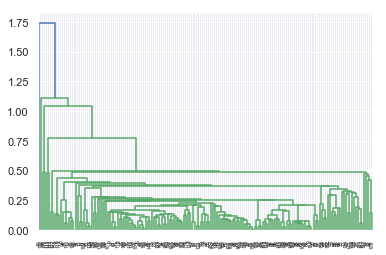

In [232]:
# single linkage
mergings = linkage(data_cluster1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

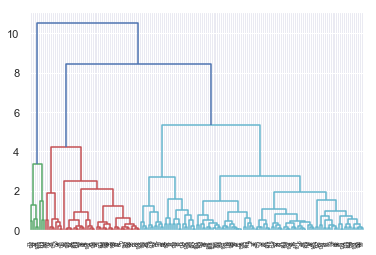

In [231]:
# complete linkage
mergings2 = linkage(data_cluster1, method="complete", metric='euclidean')
dendrogram(mergings2)
plt.show()

From the above, we can see that the complete linkage is a far better method to produce clusters in our case. However, with using 3 clusters here, we get 47 countries in one single cluster. Let's use the number of clusters as **5**, to reduce the amount of countries in the worst cluster.

In [264]:
# 3 clusters and the labels. 
cluster_labels = cut_tree(mergings2, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 4, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 3, 3,
       4, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       2, 1, 3, 1, 1, 1, 0, 4, 3, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 4,
       3, 2, 2, 4, 1, 0, 1, 1, 1, 1, 1, 3, 4, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       4, 3, 3, 1, 0, 3, 3, 1, 1, 0, 1, 3, 4, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0])

In [265]:
# assigning cluster labels
countries_data2['ClusterID2'] = cluster_labels
countries_data2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID,ClusterID2
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637813,1.485365,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022821,-1.429712,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.456235,-0.707360,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722764,2.152293,1,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649117,-1.017742,0,1


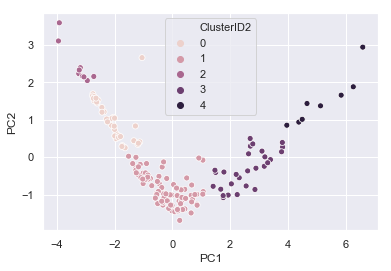

In [266]:
# plotting the clusters
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID2',legend='full',data=countries_data2)

In [271]:
grouped2 = countries_data2.groupby('ClusterID2')
grouped2[['child_mort','income','gdpp']].mean()

,child_mort,income,gdpp
ClusterID2,,,
0,63.342105,8573.263158,4122.842105
1,27.538554,14841.060241,10254.096386
2,99.866667,8315.666667,6424.111111
3,12.850000,36363.928571,31034.214286
4,44.587500,26157.500000,28627.625000


In [267]:
# function to plot graphs for univariate analysis for continuous variable
def univariate_cluster2(df,col1,col2,col3):
    '''
    Univariate function will plot a scatter plot based on the parameters.
    df      : dataframe name
    col1    : Column name
    col2    : Column name
    col3    : Column name
    '''
    sns.set(style="darkgrid")
    plt.figure(figsize=(20,8))
    
    plt.subplot(131)
    sns.boxplot(data=df, x='ClusterID2', y=col1)
    
    plt.subplot(132)
    sns.boxplot(data=df, x='ClusterID2', y=col2)
    
    plt.subplot(133)
    sns.boxplot(data=df, x='ClusterID2', y=col3)
    plt.show()

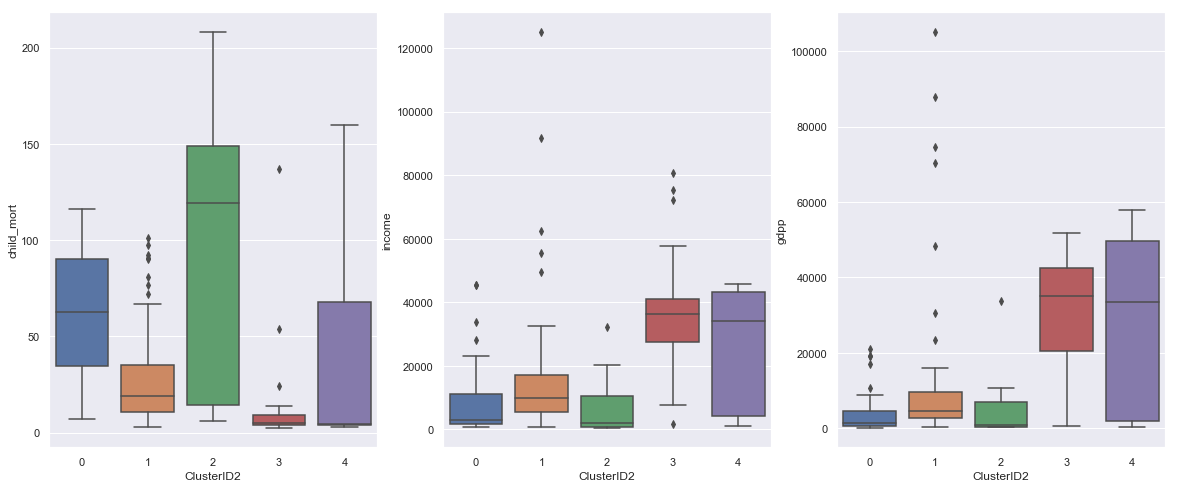

In [268]:
univariate_cluster2(countries_data2,'child_mort','income','gdpp')

From above, we can see that the cluster with clusterID2 = 2 is the worst performing cluster. As we assigned the number of clusters to 5 in hierarchical clustering with complete linkage, the worst cluster has 9 countries which is a lot more manageable. This means these 9 countries are lower in 2 of the categories among the 9 ones. However this cluster has some entries such as New Zealand, Maldives, Seychelles which look out of place for this cluster.

In [272]:
# countries with the worst cluster according to hierarchical 
countries_data2[countries_data2.ClusterID2 == 2][['country','child_mort','income','gdpp']]

,country,child_mort,income,gdpp
3,Angola,119.0,5900,3530
31,Central African Republic,149.0,888,446
32,Chad,150.0,1930,897
37,"Congo, Dem. Rep.",116.0,609,334
66,Haiti,208.0,1500,662
96,Maldives,13.2,10500,7100
111,New Zealand,6.2,32300,33700
112,Niger,123.0,814,348
131,Seychelles,14.4,20400,10800


In [274]:
# countries with the second worst cluster according to hierarchical 
countries_data2[countries_data2.ClusterID2 == 0][['country','child_mort','income','gdpp']].head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
17,Benin,111.0,1820,758
21,Botswana,52.5,13300,6350
25,Burkina Faso,116.0,1430,575
26,Burundi,93.6,764,231


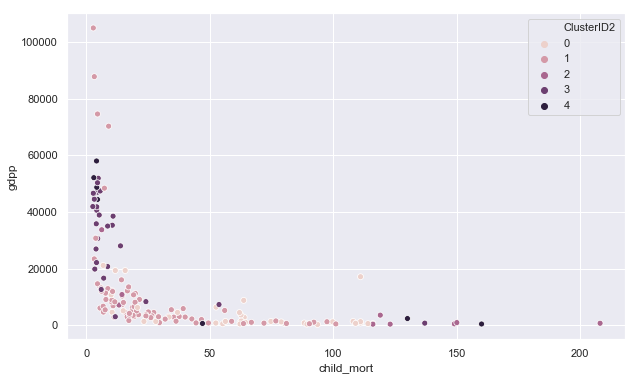

In [275]:
# plotting scatter plot child_mort vs gdpp
plt.figure(figsize=(10,6))
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID2',legend='full',data=countries_data2)

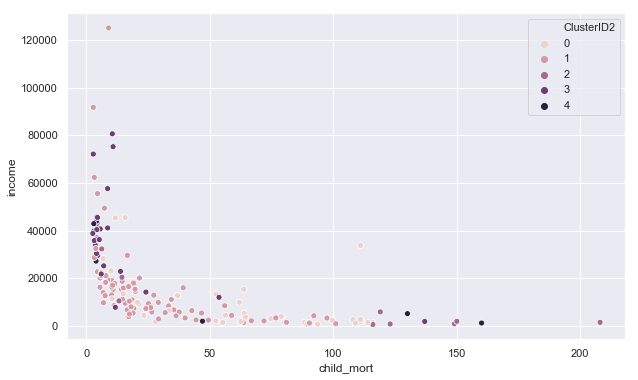

In [276]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='child_mort',y='income',hue='ClusterID2',legend='full',data=countries_data2)

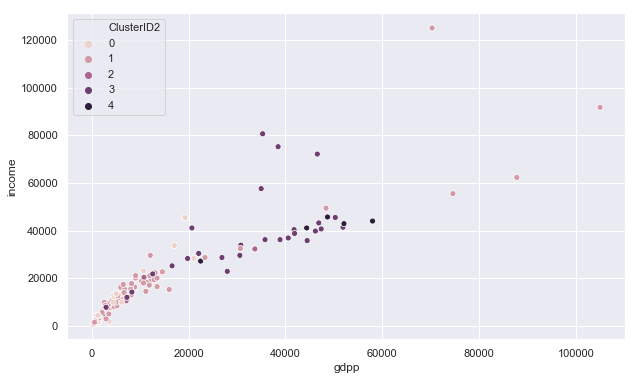

In [277]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID2',legend='full',data=countries_data2)

#### Results

So from the above dataset, the following countries should recieve the funding: **Haiti, Burundi, Liberia, Niger, Central African Republic, and Congo, Dem. Rep.** This selection of countries is based on both the k-means clustering and hierarchical clustering. The above countries are all in the worst performing cluster in the *k-means algorithm*, and 4 of the above are in the worst performing cluster in the *hierarchical algorithm*.